In [2]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
from tensorflow import keras

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df = pd.read_csv('MDD_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179097 entries, 0 to 179096
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Age                   179096 non-null  object
 1   Sex                   179096 non-null  object
 2   Race                  179096 non-null  object
 3   Employment Status     179096 non-null  object
 4   Education Status      179096 non-null  object
 5   Alcohol               179096 non-null  object
 6   Drugs                 179096 non-null  object
 7   High Blood Pressure   179096 non-null  object
 8   Obesity               179096 non-null  object
 9   Diabetes              179096 non-null  object
 10  Smokes                179096 non-null  object
 11  Other Mental Illness  179096 non-null  object
 12  Insurance             179096 non-null  object
 13  Financial Assistance  179096 non-null  object
 14  Mental Illness        179096 non-null  object
dtypes: object(15)
mem

In [5]:
test_df = df.copy()

In [6]:
df.replace({'YES':1 ,'NO':0}, inplace=True)

In [7]:
df.replace({'FEMALE': 0, 'MALE': 1}, inplace=True)

In [8]:
df.replace({'CHILD': 0, 'ADULT': 1}, inplace=True)

In [9]:
df.replace({'BLACK': 0, 'WHITE': 1}, inplace=True)

In [10]:
df.replace({'NOT EMPLOYED': 0, 'EMPLOYED': 1}, inplace=True)

In [11]:
df_one = pd.get_dummies(df["Education Status"])

In [12]:
new_df = pd.concat((df, df_one), axis=1)
new_df = new_df.drop(["Education Status","Unknown"], axis=1)
new_df

,Age,Sex,Race,Employment Status,Alcohol,Drugs,High Blood Pressure,Obesity,Diabetes,Smokes,Other Mental Illness,Insurance,Financial Assistance,Mental Illness,College,High School
0,1.0,1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0,1
1,1.0,1,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0
2,1.0,1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1,0
3,1.0,0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0,1
4,1.0,1,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179092,0.0,1,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0,1
179093,0.0,1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0,0
179094,0.0,0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0,1
179095,0.0,0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0,1


In [13]:
new_df['Sex'] = new_df['Sex'].apply(lambda x: 1 if x=='UNKNOWN' else x)

In [14]:
def show_unique(df):
    for col in df:
        print(f'{col} unique: {df[col].unique()}')

In [15]:
show_unique(new_df)

Age unique: [ 1.  0. nan]
Sex unique: [ 1.  0. nan]
Race unique: [ 0.  1. nan]
Employment Status unique: [ 0.  1. nan]
Alcohol unique: [ 0.  1. nan]
Drugs unique: [ 0.  1. nan]
High Blood Pressure unique: [ 1.  0. nan]
Obesity unique: [ 1.  0. nan]
Diabetes unique: [ 1.  0. nan]
Smokes unique: [ 1.  0. nan]
Other Mental Illness unique: [ 1.  0. nan]
Insurance unique: [ 0.  1. nan]
Financial Assistance unique: [ 0.  1. nan]
Mental Illness unique: [ 1.  0. nan]
College unique: [0 1]
High School unique: [1 0]


In [16]:
new_df['Mental Illness'].value_counts()

1.0    166407
0.0     12689
Name: Mental Illness, dtype: int64

In [17]:
new_df = new_df[:179096]

In [18]:
X = new_df.drop('Mental Illness',axis=1)
y = new_df['Mental Illness']
# X = np.asarray(X).astype(np.float32)

In [19]:


smote = SMOTE(sampling_strategy='minority')

X_smot, y_smot = smote.fit_resample(X,y)
X_smot = np.asarray(X_smot).astype(np.float32)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [20]:
print(len(X_smot),len(y_smot))

332814 332814


In [21]:

X_train, X_test, y_train, y_test = train_test_split(X_smot,y_smot,test_size=0.3, stratify=y_smot)

In [22]:
model = keras.Sequential([
    keras.layers.Dense(15, input_shape=(15,), activation='relu'),
    keras.layers.Dense(60, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
7281/7281 [==============================] - 31s 4ms/step - loss: 0.4846 - accuracy: 0.7729
Epoch 2/100
7281/7281 [==============================] - 27s 4ms/step - loss: 0.4706 - accuracy: 0.7793
Epoch 3/100
7281/7281 [==============================] - 27s 4ms/step - loss: 0.4666 - accuracy: 0.7805
Epoch 4/100
7281/7281 [==============================] - 27s 4ms/step - loss: 0.4637 - accuracy: 0.7816
Epoch 5/100
7281/7281 [==============================] - 27s 4ms/step - loss: 0.4614 - accuracy: 0.7816
Epoch 6/100
7281/7281 [==============================] - 27s 4ms/step - loss: 0.4590 - accuracy: 0.7830
Epoch 7/100
7281/7281 [==============================] - 27s 4ms/step - loss: 0.4573 - accuracy: 0.7831
Epoch 8/100
7281/7281 [==============================] - 28s 4ms/step - loss: 0.4557 - accuracy: 0.7837
Epoch 9/100
7281/7281 [==============================] - 28s 4ms/step - loss: 0.4542 - accuracy: 0.7840
Epoch 10/100
7281/7281 [==============================] - 27s 4m

In [23]:
model.evaluate(X_test,y_test)

3121/3121 [==============================] - 8s 3ms/step - loss: 0.4308 - accuracy: 0.7951


[0.43082329630851746, 0.7950723767280579]

In [24]:
y_pred = model.predict(X_test)
y_pred

array([[0.522248  ],
       [0.53059775],
       [0.04575285],
       ...,
       [0.20277989],
       [0.649606  ],
       [0.7297189 ]], dtype=float32)

In [25]:
y_preds = []
for y in y_pred:
    if y>0.5:
        y_preds.append(1)
    else:
        y_preds.append(0)

In [26]:
print(y_test[:5])
print(y_preds[:5])

[1. 1. 0. 1. 1.]
[1, 1, 0, 1, 1]


In [27]:

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80     49922
         1.0       0.81      0.77      0.79     49923

    accuracy                           0.80     99845
   macro avg       0.80      0.80      0.79     99845
weighted avg       0.80      0.80      0.79     99845



In [28]:
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_preds)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[40938,  8984],
       [11477, 38446]], dtype=int32)>

Text(33.0, 0.5, 'true')

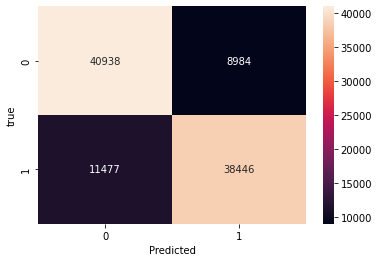

In [29]:

sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel("true")